In [1]:
import os 

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns

import numpy as np
import torch
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

from experiments.utils import load_results

/home/farshed.abdukhakimov/.conda/envs/psps/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
def dsw(list_, max_window_size=4):
    
    start = 0
    window_size = 1
    results = []
    mean = lambda x: sum(x) / len(x)

    while True:
        
        if start+window_size > len(list_):
            if start == len(list_): break
            results.append(round(mean(list_[start:]), 6))
            break
        else:
            results.append(round(mean(list_[start:start+window_size]), 6))
        start = start+window_size
        
        if window_size < max_window_size:
            window_size += 1
            
    return results

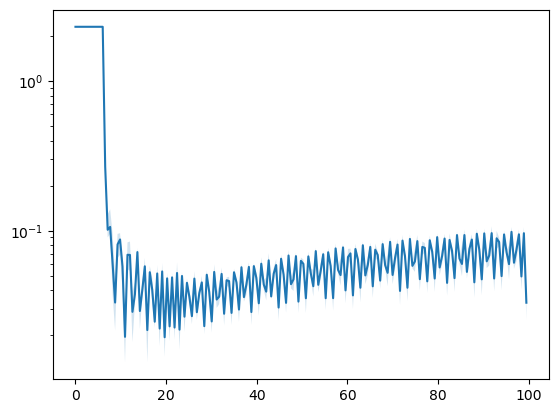

In [61]:
hist_all = []
for seed in range(5):
    hist = load_results("MNIST", "LeNet5", 0, 128, 100, "sania_adagrad_sqr", 1.0, seed)
    hist_all.append(hist)

train_loss = [dsw(x["test_hist"]["batch_loss"], 50) for x in hist_all]

mean_line = np.mean(train_loss, axis=0)
max_line = np.max(train_loss, axis=0)
min_line = np.min(train_loss, axis=0)

data_size = len(train_loss[0])
epochs = 100
x = torch.tensor([i for i in range(data_size)])/data_size*epochs

plt.fill_between(x, max_line, min_line, alpha=0.2) 
plt.semilogy(x, mean_line)
    

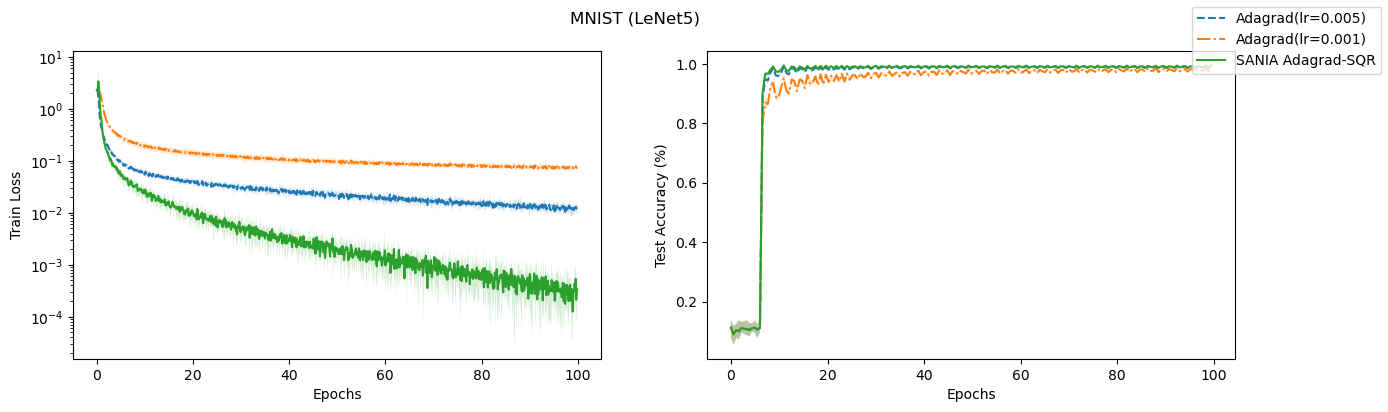

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

dataset = "MNIST"
model = "LeNet5"
method = "adagrad"
lrs = [0.005, 0.001]
epochs = 100

### ACCURACY

for lr, ls in zip(lrs, ["--", "-."]):
    hist_all = []
    for seed in range(5):
        hist = load_results(dataset, model, 0, 128, epochs, method, lr, seed)
        hist_all.append(hist)
        
    train_loss = [dsw(x["test_hist"]["batch_accuracy"], 50) for x in hist_all]

    mean_line = np.mean(train_loss, axis=0)
    max_line = np.max(train_loss, axis=0)
    min_line = np.min(train_loss, axis=0)

    data_size = len(train_loss[0])
    x = torch.tensor([i for i in range(data_size)])/data_size*epochs

    ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[1].plot(x, mean_line, linestyle=ls)


hist_all = []
for seed in range(5):
    hist = load_results(dataset, model, 0, 128, epochs, f"sania_{method}_sqr", 1.0, seed)
    hist_all.append(hist)

train_loss = [dsw(x["test_hist"]["batch_accuracy"], 50) for x in hist_all]

mean_line = np.mean(train_loss, axis=0)
max_line = np.max(train_loss, axis=0)
min_line = np.min(train_loss, axis=0)

# x = np.linspace(0, mean_line.shape[0] - 1, mean_line.shape[0])
data_size = len(train_loss[0])
x = torch.tensor([i for i in range(data_size)])/data_size*epochs

ax[1].fill_between(x, max_line, min_line, alpha=0.2) 
ax[1].plot(x, mean_line)



#### LOSS

for lr, ls in zip(lrs, ["--", "-."]):
    hist_all = []
    for seed in range(5):
        hist = load_results(dataset, model, 0, 128, epochs, method, lr, seed)
        hist_all.append(hist)
        
    train_loss = [dsw(x["train_hist"]["batch_loss"], 50) for x in hist_all]

    mean_line = np.mean(train_loss, axis=0)
    max_line = np.max(train_loss, axis=0)
    min_line = np.min(train_loss, axis=0)

    data_size = len(train_loss[0])
    x = torch.tensor([i for i in range(data_size)])/data_size*epochs

    ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
    ax[0].semilogy(x, mean_line, linestyle=ls, label=f"{method.capitalize()}(lr={lr})")


hist_all = []
for seed in range(5):
    hist = load_results(dataset, model, 0, 128, epochs, f"sania_{method}_sqr", 1.0, seed)
    hist_all.append(hist)

train_loss = [dsw(x["train_hist"]["batch_loss"], 50) for x in hist_all]

mean_line = np.mean(train_loss, axis=0)
max_line = np.max(train_loss, axis=0)
min_line = np.min(train_loss, axis=0)

data_size = len(train_loss[0])
x = torch.tensor([i for i in range(data_size)])/data_size*epochs

ax[0].fill_between(x, max_line, min_line, alpha=0.2) 
ax[0].semilogy(x, mean_line, label=f"SANIA {method.capitalize()}-SQR")


fig.suptitle(f"{dataset} ({model})")
ax[1].set_ylabel("Test Accuracy (%)")
ax[0].set_ylabel("Train Loss")

ax[1].set_xlabel("Epochs")
ax[0].set_xlabel("Epochs")



fig.legend()
fig.show()

fig.savefig(f"experiments/plots/SANIA-DNN-Experiments/{dataset}_{model}_{method}_{lrs}.pdf", format="pdf")

# plt.ylim(bottom=0.9, top=1.0)